# Problem 5 
# b) Explain what MNIST dataset is
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

# c) Find the performance for KNN, Logistic Regression, LDA and QDA

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

Saving figure some_digit_plot


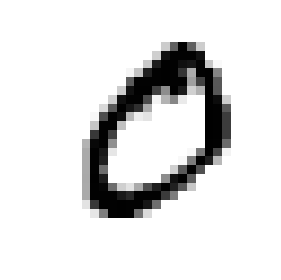

In [29]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [30]:
y[1]

0

In [8]:
y = y.astype(np.uint8)

In [9]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [10]:

# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


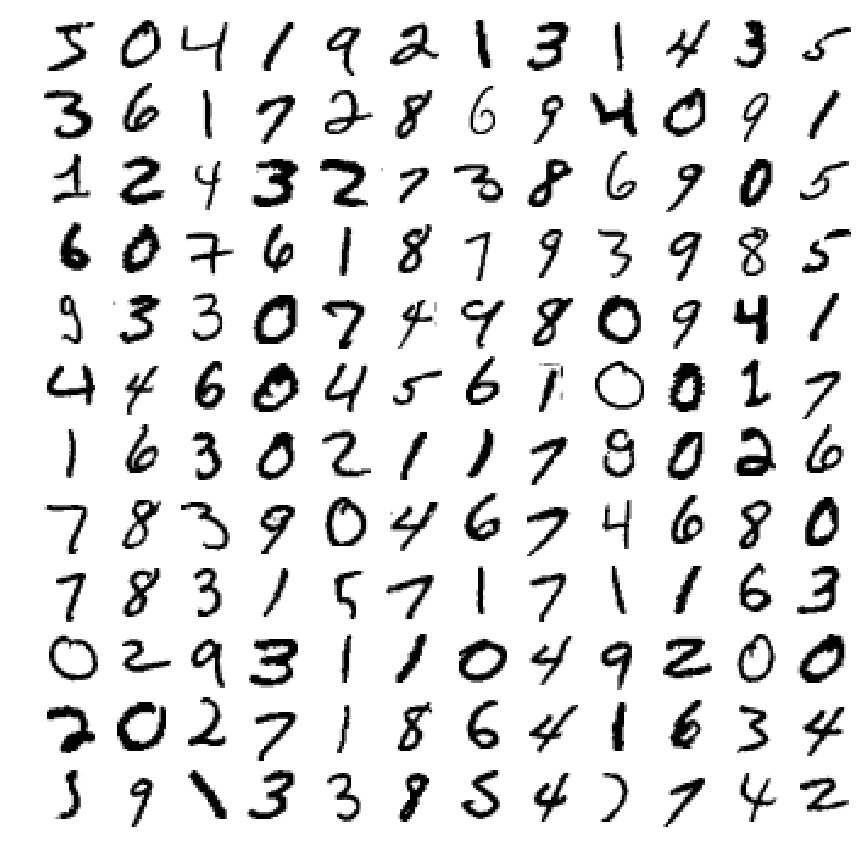

In [13]:
plt.figure(figsize=(12,12))
example_images = X[:144]
plot_digits(example_images, images_per_row=12)
save_fig("more_digits_plot")
plt.show()

In [15]:
y[1]

0

In [21]:
X[1,].shape

(784,)

Train/test split.

In [22]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Classify '0' and 'not 0' classes.

In [25]:
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

y_multilabel = np.c_[y_train_0, y_train_not_0]
## creat a multiclass label for 0 and not_0

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
## fit train set X_train into 0 and not_0 classes with KNN classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [32]:
knn_clf.predict([some_digit])
## output format: array(0: true or flase,not_0: true or flase)
## some_digit = X[1] = 0, the output will be array(true, false)
## some_digit = X[3] = 1, the outpput will be array(false,true)

array([[ True, False]])

In [37]:
from sklearn.model_selection import cross_val_predict
## use cross validation
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train_0, cv=3)
y_test_knn_pred = cross_val_predict(knn_clf, X_test, y_test_0, cv=3)

KNN train set confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_0, y_train_knn_pred)

array([[53962,   115],
       [   48,  5875]], dtype=int64)

KNN test set confusion matrix

In [60]:
confusion_matrix(y_test_0, y_test_knn_pred)

array([[8985,   35],
       [  16,  964]], dtype=int64)

KNN train set precision and recall score

In [100]:
print("Train set Precision: {:.2f}%".format(100 * precision_score(y_train_0, y_train_knn_pred)))
print("Train set Recall: {:.2f}%".format(100 * recall_score(y_train_0, y_train_knn_pred)))

Train set Precision: 98.08%
Train set Recall: 99.19%


KNN test set precision and recall score

In [101]:
print("Test set Precision: {:.2f}%".format(100 * precision_score(y_test_0, y_test_knn_pred)))
print("Test set Recall: {:.2f}%".format(100 * recall_score(y_test_0, y_test_knn_pred)))

Test set Precision: 96.50%
Test set Recall: 98.37%


# Logistic Regression

In [46]:
from sklearn. linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [47]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)

In [69]:
from sklearn.metrics import precision_score, recall_score

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
log_clf.fit(X_train, y_train_0)

y_train_LD_pred = log_clf.predict(X_train)
y_test_LD_pred = log_clf.predict(X_test)

C:\Users\Hongr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Logistic Regression train set confusion matrix 

In [70]:
confusion_matrix(y_train_0, y_train_LD_pred)

array([[53895,   182],
       [  221,  5702]], dtype=int64)

Logistic Regression test set confusion matrix

In [67]:
confusion_matrix(y_test_0, y_test_LD_pred)

array([[8974,   46],
       [  32,  948]], dtype=int64)

Logistic Regression train set precision and recall score

In [68]:
print("Train set Precision: {:.2f}%".format(100 * precision_score(y_train_0, y_train_LD_pred)))
print("Train set Recall: {:.2f}%".format(100 * recall_score(y_train_0, y_train_LD_pred)))

Train set Precision: 96.91%
Train set Recall: 96.27%


Logistic Regression test set precision and recall score

In [66]:
print("Test set Precision: {:.2f}%".format(100 * precision_score(y_test_0, y_test_LD_pred)))
print("Test set Recall: {:.2f}%".format(100 * recall_score(y_test_0, y_test_LD_pred)))

Test set Precision: 95.37%
Test set Recall: 96.73%


# LDA

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='svd')
y_train_LDA_pred = lda.fit(X_train, y_train_0).predict(X_train)
y_test_LDA_pred = lda.fit(X_test, y_test_0).predict(X_test)

C:\Users\Hongr\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Hongr\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA train set confusion matrix

In [72]:
confusion_matrix(y_train_0, y_train_LDA_pred)

array([[53735,   342],
       [  511,  5412]], dtype=int64)

LDA test set confusion matrix

In [74]:
confusion_matrix(y_test_0, y_test_LDA_pred)

array([[8964,   56],
       [  58,  922]], dtype=int64)

LDA train set precision and recall score

In [75]:
print("Train set Precision: {:.2f}%".format(100 * precision_score(y_train_0, y_train_LDA_pred)))
print("Train set Recall: {:.2f}%".format(100 * recall_score(y_train_0, y_train_LDA_pred)))

Train set Precision: 94.06%
Train set Recall: 91.37%


LDA test set precision and recall score

In [76]:
print("Test set Precision: {:.2f}%".format(100 * precision_score(y_test_0, y_test_LDA_pred)))
print("Test set Recall: {:.2f}%".format(100 * recall_score(y_test_0, y_test_LDA_pred)))

Test set Precision: 94.27%
Test set Recall: 94.08%


# QDA

In [77]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [80]:
qda = QuadraticDiscriminantAnalysis()

In [95]:
y_train_QDA_pred = qda.fit(X_train, y_train_0).predict(X_train)
y_test_QDA_pred = qda.fit(X_test, y_test_0).predict(X_test)

C:\Users\Hongr\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Hongr\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA train set confusion matrix

In [96]:
confusion_matrix(y_train_0, y_train_QDA_pred)

array([[17766, 36311],
       [    1,  5922]], dtype=int64)

QDA test set confusion matrix

In [97]:
confusion_matrix(y_test_0, y_test_QDA_pred)

array([[4457, 4563],
       [   0,  980]], dtype=int64)

QDA train set precision and recall score

In [98]:
print("Train set Precision: {:.2f}%".format(100 * precision_score(y_train_0, y_train_QDA_pred)))
print("Train set Recall: {:.2f}%".format(100 * recall_score(y_train_0, y_train_QDA_pred)))

Train set Precision: 14.02%
Train set Recall: 99.98%


QDA test set precision and recall score

In [99]:
print("Test set Precision: {:.2f}%".format(100 * precision_score(y_test_0, y_test_QDA_pred)))
print("Test set Recall: {:.2f}%".format(100 * recall_score(y_test_0, y_test_QDA_pred)))

Test set Precision: 17.68%
Test set Recall: 100.00%


# d) Compare the performance of the above classifiers for both traning and test dataset according to confusion matrix, precision score and recall score.

1. In general the test sets have similar precision and recall score for all classifiers. 
2. The performance rank: KNN > Logistic Regression > LDA > QDA
3. QDA has a very low precision score for both traning and test set, this implies that QDA is not a good traning model for MNIST dataset